In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tratamento de dados

## Carregamento e analises iniciais 

In [2]:
df = pd.read_csv('cota-parlamentar.csv')
df.head() #visualiza os primeiros itens do data frame

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


In [3]:
df.info() #mostra os tipos de dados de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855649 entries, 0 to 3855648
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   codlegislatura             int64  
 1   datemissao                 object 
 2   idedocumento               int64  
 3   idecadastro                float64
 4   indtipodocumento           int64  
 5   nucarteiraparlamentar      float64
 6   nudeputadoid               int64  
 7   nulegislatura              int64  
 8   numano                     int64  
 9   numespecificacaosubcota    int64  
 10  numlote                    int64  
 11  nummes                     int64  
 12  numparcela                 int64  
 13  numressarcimento           float64
 14  numsubcota                 int64  
 15  sgpartido                  object 
 16  sguf                       object 
 17  txnomeparlamentar          object 
 18  txtcnpjcpf                 int64  
 19  txtdescricao               object 
 20  tx

In [4]:
df.describe() #mostra números ref as colunas

,codlegislatura,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,txtcnpjcpf,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
count,3.855649e+06,3.855649e+06,3.850144e+06,3.855649e+06,3.850151e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,1733796.0,3.855649e+06,3.855649e+06,3.855632e+06,3.855649e+06,3.855649e+06,1150.000000
mean,5.435852e+01,2.729065e+06,1.286019e+05,3.411021e-01,3.146683e+02,1.974208e+03,2.012434e+03,2.013999e+03,2.209231e-01,5.622804e+05,6.574990e+00,1.758459e-04,0.0,2.668642e+02,1.108942e+13,5.505108e+02,4.765311e+00,5.444028e+02,962.241861
std,8.426546e-01,2.533703e+06,4.413991e+04,8.083297e-01,1.657848e+02,7.552428e+02,3.370618e+00,3.023998e+00,4.899672e-01,5.940902e+05,3.310913e+00,1.325953e-02,0.0,4.295009e+02,1.888940e+13,1.955870e+03,1.384766e+02,1.935002e+03,2986.046729
min,5.300000e+01,0.000000e+00,3.151000e+03,0.000000e+00,1.000000e+00,1.200000e+01,2.007000e+03,2.009000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00,-2.097470e+04,0.000000e+00,-2.097470e+04,1.000000
25%,5.400000e+01,0.000000e+00,7.439500e+04,0.000000e+00,1.830000e+02,1.552000e+03,2.011000e+03,2.011000e+03,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.0,3.000000e+00,5.212940e+11,4.088000e+01,0.000000e+00,4.019000e+01,43.190000
50%,5.400000e+01,1.786225e+06,1.414780e+05,0.000000e+00,3.160000e+02,1.926000e+03,2.011000e+03,2.014000e+03,0.000000e+00,4.564800e+05,7.000000e+00,0.000000e+00,0.0,1.100000e+01,4.061928e+12,1.280000e+02,0.000000e+00,1.263100e+02,118.565000
75%,5.500000e+01,5.595603e+06,1.606390e+05,0.000000e+00,4.630000e+02,2.393000e+03,2.015000e+03,2.016000e+03,0.000000e+00,1.165132e+06,9.000000e+00,0.000000e+00,0.0,9.990000e+02,9.296295e+12,4.378025e+02,0.000000e+00,4.335300e+02,375.970000
max,5.600000e+01,7.033421e+06,2.132740e+05,4.000000e+00,6.740000e+02,3.466000e+03,2.019000e+03,2.020000e+03,4.000000e+00,1.685002e+06,1.200000e+01,1.000000e+00,0.0,9.990000e+02,9.874986e+13,2.150000e+05,8.600000e+04,2.150000e+05,73200.000000


## Selecionando as colunas mais relevantes para a análise

In [5]:
df_relevante = df[['txnomeparlamentar', 'sgpartido', 'sguf', 'datemissao', 'vlrdocumento', 'vlrglosa', 'vlrliquido', 'txtfornecedor', 'txtdescricao', 'numano']]
df_relevante.head()

,txnomeparlamentar,sgpartido,sguf,datemissao,vlrdocumento,vlrglosa,vlrliquido,txtfornecedor,txtdescricao,numano
0,LIDERANÇA DO PSDB,PSDB,NaN,2020-02-01 00:00:00,998.0,0.0,998.0,CONTENT ASSESSORIA LTDA - ME,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,2020
1,LIDERANÇA DO PSDB,PSDB,NaN,2020-02-13 00:00:00,4920.0,0.0,4920.0,METROPOLE INTERATIVA INFORMATICA LTDA,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,2020
2,LIDERANÇA DO PSDB,PSDB,NaN,2020-02-04 00:00:00,511.0,0.0,511.0,AFC ALIMENTOS LTDA,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,2020
3,LIDERANÇA DO PSDB,PSDB,NaN,2020-02-18 00:00:00,186.0,0.0,186.0,AFC ALIMENTOS LTDA,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,2020
4,LIDERANÇA DO PSDB,PSDB,NaN,2020-02-11 00:00:00,740.0,0.0,740.0,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,2020


## Tratar valores nulos

In [6]:
# Verificar valores nulos
print(df_relevante.isnull().sum())

txnomeparlamentar         0
sgpartido                 0
sguf                   5505
datemissao           190545
vlrdocumento             17
vlrglosa                  0
vlrliquido                0
txtfornecedor             9
txtdescricao              0
numano                    0
dtype: int64


In [7]:
# Preencher valores ausentes de 'sguf' com 'Desconhecido'
df_relevante['sguf'] = df_relevante['sguf'].fillna('Desconhecido')

# 2. Remover linhas com 'datemissao' nulo
df_relevante = df_relevante.dropna(subset=['datemissao'])

# 3. Remover linhas com valores nulos em 'vlrdocumento' ou 'txtfornecedor'
df_relevante = df_relevante.dropna(subset=['vlrdocumento', 'txtfornecedor'])

# Exibir a contagem de valores nulos após o tratamento
print("\nValores nulos após tratamento:")
print(df_relevante.isnull().sum())

C:\Users\renat\AppData\Local\Temp\ipykernel_9104\1489476385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['sguf'] = df_relevante['sguf'].fillna('Desconhecido')



Valores nulos após tratamento:
txnomeparlamentar    0
sgpartido            0
sguf                 0
datemissao           0
vlrdocumento         0
vlrglosa             0
vlrliquido           0
txtfornecedor        0
txtdescricao         0
numano               0
dtype: int64


## Remover duplicatas (se necessário)

In [8]:
df_relevante = df_relevante.drop_duplicates()

## Converter a coluna 'datemissao' para o tipo datetime

In [9]:
df_relevante['datemissao'] = pd.to_datetime(df_relevante['datemissao'], errors='coerce')

## Verificar se a coluna de valores numéricos está correta


In [10]:
df_relevante[['vlrdocumento', 'vlrglosa', 'vlrliquido']] = df_relevante[['vlrdocumento', 'vlrglosa', 'vlrliquido']].apply(pd.to_numeric, errors='coerce')

# Analise de dados

### 1. Gasto total por parlamentar.

o código para calcular o total gasto por cada parlamentar, agrupando pelo nome e somando os valores da coluna vlrliquido

In [11]:
# Gasto total por parlamentar
gasto_por_parlamentar = df_relevante.groupby('txnomeparlamentar')['vlrliquido'].sum().reset_index()

# Ordenar os parlamentares pelos maiores gastos
gasto_por_parlamentar = gasto_por_parlamentar.sort_values(by='vlrliquido', ascending=False)

# Exibir os 10 parlamentares que mais gastaram
print(gasto_por_parlamentar.head(20))


             txnomeparlamentar  vlrliquido
1317              Silas Câmara  4963632.16
423                 Edio Lopes  4746017.60
434           Elcione Barbalho  4680362.00
433               Efraim Filho  4676202.72
178                  Beto Faro  4613418.99
741   José Airton Félix Cirilo  4596500.90
742             José Guimarães  4583364.62
284               Cleber Verde  4567624.57
1462                Átila Lins  4548116.94
505              Flaviano Melo  4530455.38
1143             Paulo Pimenta  4473532.73
769                Júlio Cesar  4464982.25
574           Gonzaga Patriota  4459878.65
563                    Giacobo  4401738.14
337             Daniel Almeida  4393336.59
731          Jhonatan de Jesus  4374587.03
1437        Wellington Roberto  4367774.64
1397             Vander Loubet  4312621.85
1168   RAIMUNDO GOMES DE MATOS  4291728.14
519                Fábio Faria  4287445.46


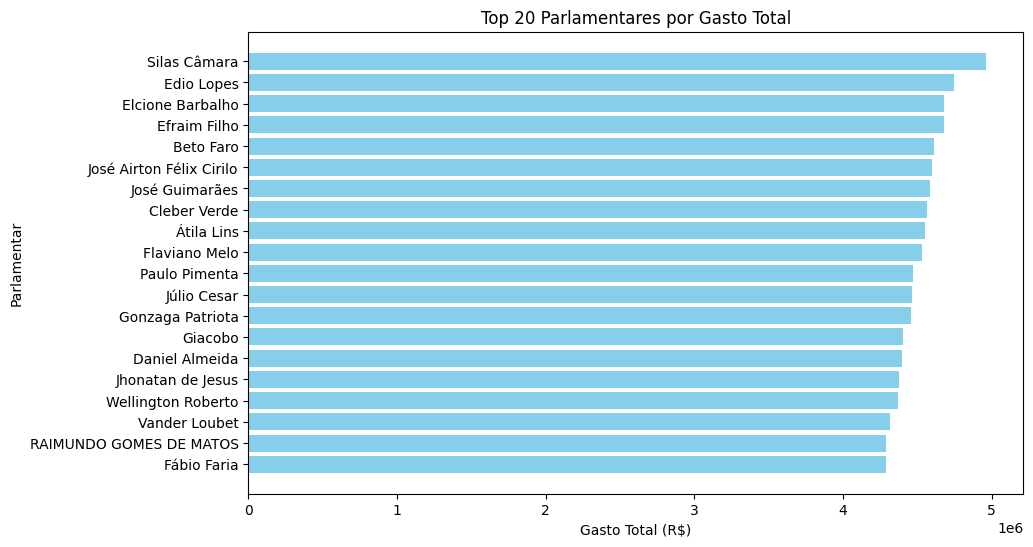

In [12]:


# Selecionar os 10 parlamentares que mais gastaram
top_20_parlamentares = gasto_por_parlamentar.head(20)

# Criar gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(top_20_parlamentares['txnomeparlamentar'], top_20_parlamentares['vlrliquido'], color='skyblue')
plt.xlabel('Gasto Total (R$)')
plt.ylabel('Parlamentar')
plt.title('Top 20 Parlamentares por Gasto Total')
plt.gca().invert_yaxis()  # Inverter eixo para mostrar o maior no topo
plt.show()


### 2. evolução dos gastos ao longo do tempo.

In [13]:
#Código para agrupar os dados por mês e ano:

# Garantir que a coluna 'datemissao' está no formato datetime
df_relevante['datemissao'] = pd.to_datetime(df_relevante['datemissao'], errors='coerce')

# Criar uma nova coluna 'ano_mes' para agrupar por ano e mês
df_relevante['ano_mes'] = df_relevante['datemissao'].dt.to_period('M')

# Agrupar o gasto total por mês e ano
gastos_por_mes = df_relevante.groupby('ano_mes')['vlrliquido'].sum().reset_index()

# Exibir os primeiros resultados
print(gastos_por_mes.head())


   ano_mes  vlrliquido
0  1959-11      150.00
1  2000-04       60.00
2  2000-09     1880.34
3  2000-10       28.36
4  2000-11        5.60


Remover anos com poucos gastos: Vamos filtrar os anos com poucos gastos para melhorar a visualização.

Agrupar os dados por ano: Isso simplifica a visualização e destaca a tendência anual.

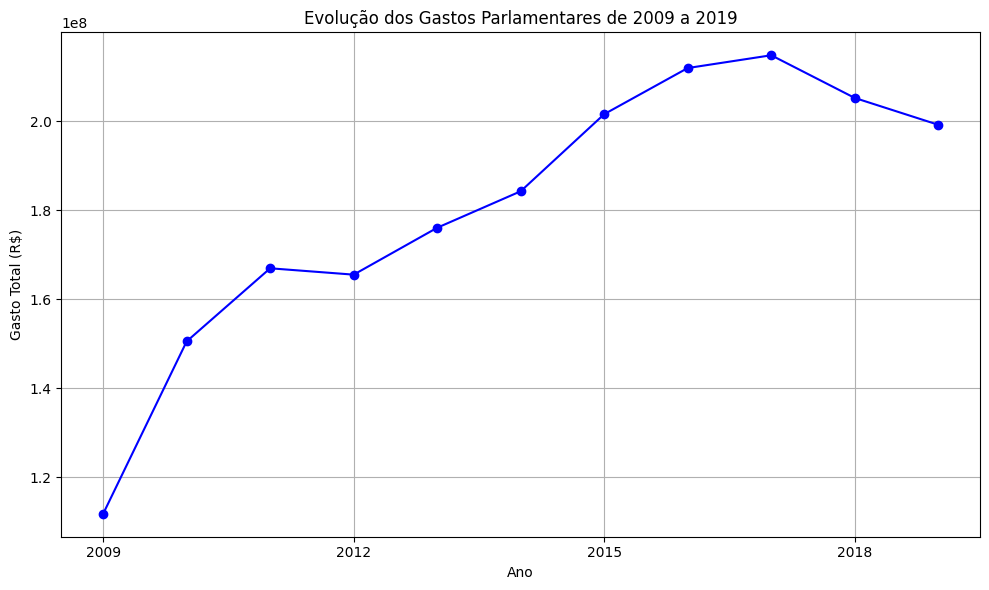

In [14]:
# Garantir que a coluna 'datemissao' está no formato datetime
df_relevante['datemissao'] = pd.to_datetime(df_relevante['datemissao'], errors='coerce')

# Criar uma nova coluna 'ano' para agrupar por ano
df_relevante['ano'] = df_relevante['datemissao'].dt.year

# Filtrar os dados apenas para o período entre 2009 e 2019
df_periodo = df_relevante[(df_relevante['ano'] >= 2009) & (df_relevante['ano'] <= 2019)]

# Agrupar o gasto total por ano
gastos_por_ano = df_periodo.groupby('ano')['vlrliquido'].sum().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(gastos_por_ano['ano'], gastos_por_ano['vlrliquido'], marker='o', linestyle='-', color='b', label='Total de Gastos')

# Ajustar o eixo x para marcar de 3 em 3 anos
plt.xticks(ticks=range(2009, 2020, 3))

# Rótulos e título
plt.xlabel('Ano')
plt.ylabel('Gasto Total (R$)')
plt.title('Evolução dos Gastos Parlamentares de 2009 a 2019')
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### 3. Gastos por partido (20 maiores partidos + "Outros")

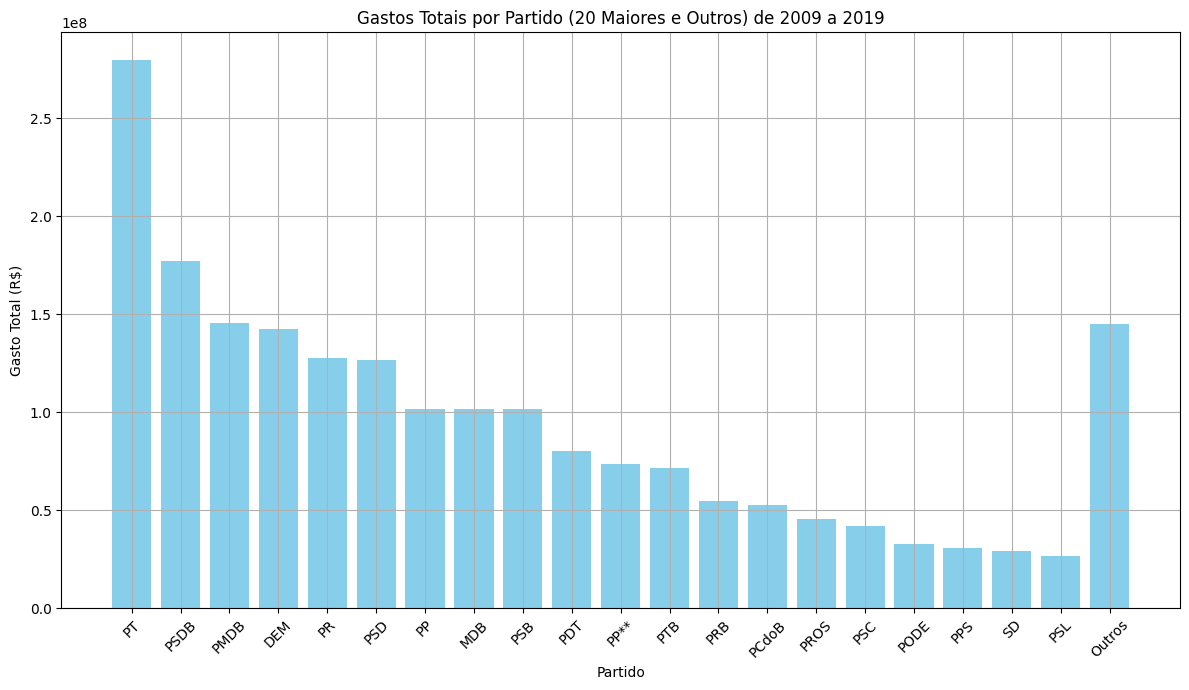

In [15]:
# Agrupar gastos por partido
gastos_por_partido = df_periodo.groupby('sgpartido')['vlrliquido'].sum().reset_index()

# Ordenar do maior para o menor gasto
gastos_por_partido = gastos_por_partido.sort_values(by='vlrliquido', ascending=False)

# Separar os 20 maiores partidos
top_20_partidos = gastos_por_partido.head(20)

# Calcular a soma dos "Outros" partidos (aqueles fora dos 20 maiores)
outros_gastos = pd.DataFrame([['Outros', gastos_por_partido.iloc[20:]['vlrliquido'].sum()]], columns=['sgpartido', 'vlrliquido'])

# Concatenar os 20 maiores partidos com a categoria "Outros"
gastos_top_20 = pd.concat([top_20_partidos, outros_gastos])

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12,7))
plt.bar(gastos_top_20['sgpartido'], gastos_top_20['vlrliquido'], color='skyblue')

# Rótulos e título
plt.xlabel('Partido')
plt.ylabel('Gasto Total (R$)')
plt.title('Gastos Totais por Partido (20 Maiores e Outros) de 2009 a 2019')
plt.xticks(rotation=45)
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### 4. Principais categorias de gastos

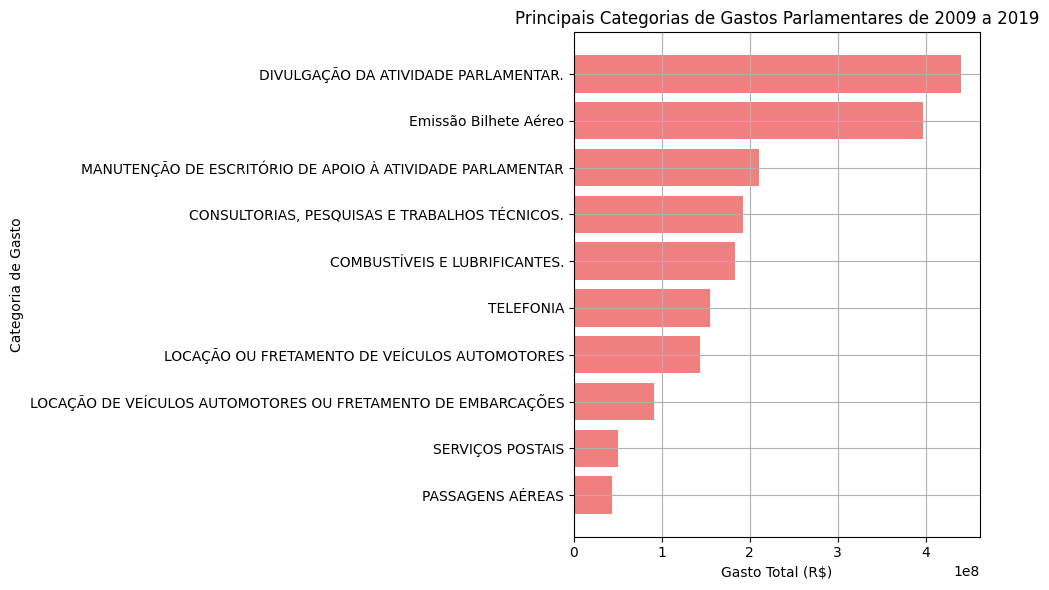

In [16]:
# Verificar se o nome correto da coluna de descrição é 'txtdescricao' ou outro
# Caso seja diferente, use o nome correto listado ao verificar as colunas
gastos_por_categoria = df_periodo.groupby('txtdescricao')['vlrliquido'].sum().reset_index()

# Ordenar do maior para o menor gasto e pegar as 10 principais categorias
gastos_top_categorias = gastos_por_categoria.sort_values(by='vlrliquido', ascending=False).head(10)
gastos_top_categorias = gastos_top_categorias.sort_values(by='vlrliquido', ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10,6))
plt.barh(gastos_top_categorias['txtdescricao'], gastos_top_categorias['vlrliquido'], color='lightcoral')

# Rótulos e título
plt.xlabel('Gasto Total (R$)')
plt.ylabel('Categoria de Gasto')
plt.title('Principais Categorias de Gastos Parlamentares de 2009 a 2019')
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### 5. Média por parlamentar

In [17]:
# Agrupar os dados por parlamentar e somar os gastos totais
gastos_por_parlamentar = df_periodo.groupby('txnomeparlamentar')['vlrliquido'].sum().reset_index()

# Contar o número de anos únicos de atuação de cada parlamentar
anos_por_parlamentar = df_periodo.groupby('txnomeparlamentar')['numano'].nunique().reset_index()

# Renomear a coluna para facilitar o merge
anos_por_parlamentar.rename(columns={'numano': 'anos_unicos'}, inplace=True)

# Mesclar o total de gastos com o número de anos únicos
gastos_e_anos = pd.merge(gastos_por_parlamentar, anos_por_parlamentar, on='txnomeparlamentar')

# Calcular a média de gastos por parlamentar (gasto total / anos únicos)
gastos_e_anos['media_gastos_por_ano'] = gastos_e_anos['vlrliquido'] / gastos_e_anos['anos_unicos']

# Ordenar pelo gasto médio
gastos_e_anos = gastos_e_anos.sort_values(by='media_gastos_por_ano', ascending=False).head(10)

# Exibir as primeiras linhas do DataFrame
print(gastos_e_anos.head())


    txnomeparlamentar  vlrliquido  anos_unicos  media_gastos_por_ano
603   Hiran Gonçalves  2566359.95            5            513271.990
768     Jéssica Sales  2538354.37            5            507670.874
132       André Abdon  2493615.87            5            498723.174
602       Hildo Rocha  2479355.19            5            495871.038
180       Beto Rosado  2429436.28            5            485887.256


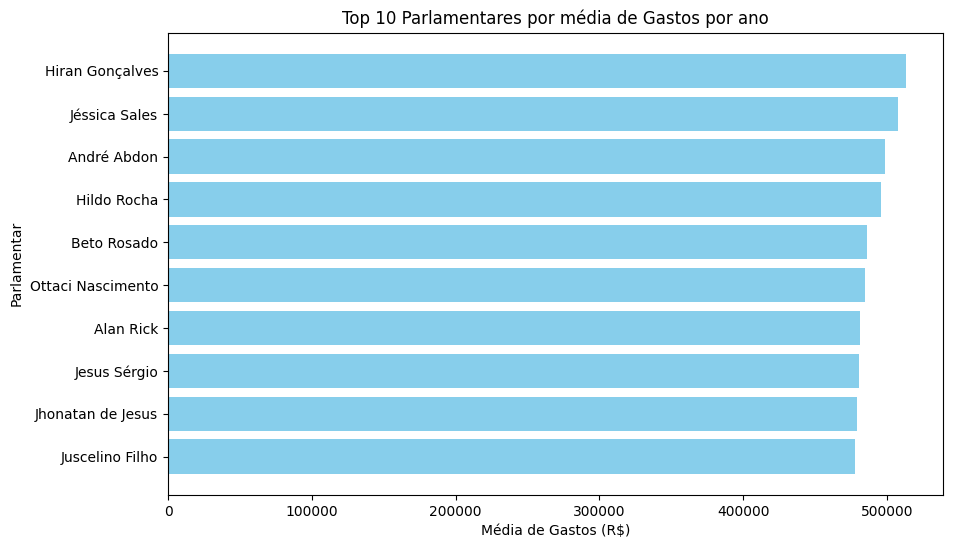

In [18]:

# Criar gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(gastos_e_anos['txnomeparlamentar'], gastos_e_anos['media_gastos_por_ano'], color='skyblue')
plt.xlabel('Média de Gastos (R$)')
plt.ylabel('Parlamentar')
plt.title('Top 10 Parlamentares por média de Gastos por ano')
plt.gca().invert_yaxis()  # Inverter eixo para mostrar o maior no topo
plt.show()

### 6. Gastos de um parlamentar

Nesta parte você pode olhar de forma mais focada os dados e escolher um parlamentar e o ano para ver os gastos por categoria 

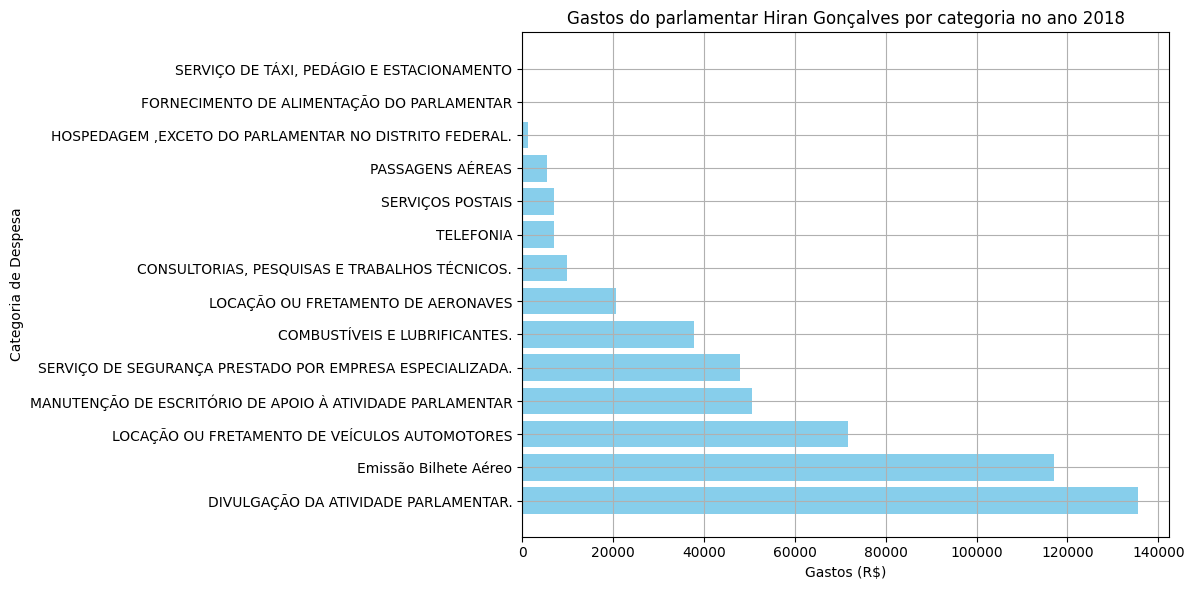

In [19]:
# Função para plotar os gastos de um parlamentar por categoria em um ano específico
def grafico_gastos_parlamentar_por_categoria(df):
    # Solicitar o nome do parlamentar ao usuário
    nome_parlamentar = input("Digite o nome do parlamentar: ")

    # Solicitar o ano de interesse ao usuário
    ano = input("Digite o ano de interesse (Ex: 2019): ")

    # Filtrar os dados para o parlamentar e o ano escolhidos
    df_filtrado = df[(df['txnomeparlamentar'].str.contains(nome_parlamentar, case=False, na=False)) &
                     (df['numano'] == int(ano))]

    # Verificar se há dados para o parlamentar e o ano escolhidos
    if df_filtrado.empty:
        print(f"Nenhum dado encontrado para o parlamentar '{nome_parlamentar}' no ano {ano}.")
        return

    # Agrupar os gastos por categoria de despesa
    gastos_por_categoria = df_filtrado.groupby('txtdescricao')['vlrliquido'].sum().reset_index()

    # Ordenar do maior para o menor gasto
    gastos_por_categoria = gastos_por_categoria.sort_values(by='vlrliquido', ascending=False)

    # Plotar o gráfico de barras
    plt.figure(figsize=(12,6))
    plt.barh(gastos_por_categoria['txtdescricao'], gastos_por_categoria['vlrliquido'], color='skyblue')

    # Rótulos e título
    plt.xlabel('Gastos (R$)')
    plt.ylabel('Categoria de Despesa')
    plt.title(f'Gastos do parlamentar {nome_parlamentar} por categoria no ano {ano}')
    plt.grid(True)

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função passando o DataFrame filtrado por período
grafico_gastos_parlamentar_por_categoria(df_periodo)
